In [1]:
##Importing Necessary Libraries and Python Magic###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Reading in data##
kick_data = pd.read_csv('FBS 2021 Kicker Stats.csv')

kick_data.drop(kick_data.columns[kick_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

kick_data = kick_data[:-14]

kick_data

,Player,Team,PAT,FG,1-19,20-29,30-39,40-49,50+,Lg,Pts
0,Matthew Dapore,AFA,24/24,7/9,1/1,1/1,4/6,1/1,0/0,49.0,45.0
1,Cory Smigel,AKR,29/30,7/11,1/1,1/1,4/5,1/3,0/1,40.0,50.0
2,Will Reichard,ALA,68/69,16/20,0/0,3/3,7/8,5/7,1/2,51.0,116.0
3,Chandler Staton,APP,52/52,19/20,0/0,8/8,5/6,6/6,0/0,48.0,109.0
4,Christian Zendejas,ASU,39/40,6/9,0/0,4/4,1/4,1/1,0/0,40.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...
113,Collin Larsh,WIS,37/38,15/20,0/0,7/8,6/8,2/3,0/1,43.0,82.0
114,Brayden Narveson,WKU,64/65,22/27,0/0,6/6,11/11,4/6,1/4,53.0,130.0
115,Dean Janikowski,WSU,39/41,14/17,0/0,5/5,7/8,2/4,0/0,41.0,81.0
116,Casey Legg,WVU,35/35,19/23,0/0,8/8,7/8,4/7,0/0,49.0,92.0


In [2]:
##Splitting all columns into two columns around the / character##
kick_data[['PATM', 'PATA']] = kick_data['PAT'].str.split('/', expand=True)
kick_data[['FGM', 'FGA']] = kick_data['FG'].str.split('/', expand=True)
kick_data[['1-19M','1-19A']] = kick_data['1-19'].str.split('/', expand=True)
kick_data[['20-29M','20-29A']] = kick_data['20-29'].str.split('/', expand=True)
kick_data[['30-39M','30-39A']] = kick_data['30-39'].str.split('/', expand=True)
kick_data[['40-49M','40-49A']] = kick_data['40-49'].str.split('/', expand=True)
kick_data[['50+M','50+A']] = kick_data['50+'].str.split('/', expand=True)


kick_data.drop(['PAT','FG',
 '1-19',
 '20-29',
 '30-39',
 '40-49',
 '50+'], axis=1, inplace=True)

kick_data.drop(kick_data.tail(1).index, inplace=True)

##Ensuring Success##
kick_data.tail()

,Player,Team,Lg,Pts,PATM,PATA,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A
112,Peyton Henry,WASH,38.0,59.0,26,26,11,14,0,0,4,4,7,7,0,2,0,1
113,Collin Larsh,WIS,43.0,82.0,37,38,15,20,0,0,7,8,6,8,2,3,0,1
114,Brayden Narveson,WKU,53.0,130.0,64,65,22,27,0,0,6,6,11,11,4,6,1,4
115,Dean Janikowski,WSU,41.0,81.0,39,41,14,17,0,0,5,5,7,8,2,4,0,0
116,Casey Legg,WVU,49.0,92.0,35,35,19,23,0,0,8,8,7,8,4,7,0,0


In [3]:
#Removing pesky null columns

kick_data.dropna(axis=1)

,Player,Team,Lg,Pts,PATM,PATA,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A
0,Matthew Dapore,AFA,49.0,45.0,24,24,7,9,1,1,1,1,4,6,1,1,0,0
1,Cory Smigel,AKR,40.0,50.0,29,30,7,11,1,1,1,1,4,5,1,3,0,1
2,Will Reichard,ALA,51.0,116.0,68,69,16,20,0,0,3,3,7,8,5,7,1,2
3,Chandler Staton,APP,48.0,109.0,52,52,19,20,0,0,8,8,5,6,6,6,0,0
4,Christian Zendejas,ASU,40.0,57.0,39,40,6,9,0,0,4,4,1,4,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Peyton Henry,WASH,38.0,59.0,26,26,11,14,0,0,4,4,7,7,0,2,0,1
113,Collin Larsh,WIS,43.0,82.0,37,38,15,20,0,0,7,8,6,8,2,3,0,1
114,Brayden Narveson,WKU,53.0,130.0,64,65,22,27,0,0,6,6,11,11,4,6,1,4
115,Dean Janikowski,WSU,41.0,81.0,39,41,14,17,0,0,5,5,7,8,2,4,0,0


In [4]:
kick_data.dtypes

Player     object
Team       object
Lg        float64
Pts       float64
PATM       object
PATA       object
FGM        object
FGA        object
1-19M      object
1-19A      object
20-29M     object
20-29A     object
30-39M     object
30-39A     object
40-49M     object
40-49A     object
50+M       object
50+A       object
dtype: object

In [5]:

pd.set_option("display.max_rows", None, "display.max_columns", None)
kick_data.sort_values('FGM')

,Player,Team,Lg,Pts,PATM,PATA,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A
51,Zeke Rankin,MTSU,46.0,74.0,44,45,10,14,0,0,7,7,2,4,1,3,0,0
29,Noel Ruiz,GAST,50.0,69.0,39,41,10,12,0,0,2,2,5,5,2,4,1,1
65,Everett Hayes,ORST,60.0,77.0,47,47,10,15,0,0,4,4,2,5,2,2,2,4
76,Joshua Karty,STAN,51.0,57.0,27,27,10,15,0,0,1,1,5,5,3,4,1,5
91,Matthew Quinn,UAB,52.0,75.0,45,46,10,15,0,0,4,5,4,6,1,1,1,3
28,Ryan Fitzgerald,FSU,53.0,67.0,37,40,10,13,0,0,3,3,4,5,2,3,1,2
17,Jonathan Cruz,CHAR,56.0,70.0,40,41,10,15,0,0,3,4,4,5,2,5,1,1
108,Brendan Farrell,UVA,43.0,67.0,34,34,11,13,0,0,4,4,6,6,1,2,0,1
31,Brent Cimaglia,GT,37.0,64.0,31,33,11,15,0,0,5,5,6,6,0,2,0,2
15,Dario Longhetto,CAL,51.0,64.0,31,31,11,14,0,0,4,4,3,3,3,5,1,2


In [6]:
#Change PATM/A to float
kick_data[['PATM', 'PATA']] = kick_data[['PATM', 'PATA']].astype('float64')

In [7]:
##Convering to int type for .sum() method##
kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']] = kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']].astype('int')

# ##Creating series of totals##
total = kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']].sum()
print(total)

FGM       1653
FGA       2157
1-19M       15
1-19A       16
20-29M     559
20-29A     601
30-39M     562
30-39A     698
40-49M     422
40-49A     627
50+M        98
50+A       216
dtype: int64


In [8]:
##Using .loc to create a new bottom row#
columns_totaled = ['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A', 'PATM', 'PATA']
for c in columns_totaled:
    kick_data.loc['Total', c] = kick_data[c].sum()
    
##Reconverting to int64##
kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']] = kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']].astype('int64')

kick_data.dropna(axis=1)

kick_data

,Player,Team,Lg,Pts,PATM,PATA,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A
0,Matthew Dapore,AFA,49.0,45.0,24.0,24.0,7,9,1,1,1,1,4,6,1,1,0,0
1,Cory Smigel,AKR,40.0,50.0,29.0,30.0,7,11,1,1,1,1,4,5,1,3,0,1
2,Will Reichard,ALA,51.0,116.0,68.0,69.0,16,20,0,0,3,3,7,8,5,7,1,2
3,Chandler Staton,APP,48.0,109.0,52.0,52.0,19,20,0,0,8,8,5,6,6,6,0,0
4,Christian Zendejas,ASU,40.0,57.0,39.0,40.0,6,9,0,0,4,4,1,4,1,1,0,0
5,Cam Little,ARK,51.0,100.0,43.0,43.0,19,23,0,0,7,7,5,6,6,7,1,3
6,Cole Talley,ARMY,33.0,62.0,41.0,43.0,7,9,0,0,3,4,4,4,0,1,0,0
7,Blake Grupe,ARST,50.0,91.0,31.0,32.0,20,25,0,0,4,4,10,12,5,8,1,1
8,Anders Carlson,AUB,49.0,77.0,35.0,36.0,14,21,0,0,6,6,2,4,6,8,0,3
9,Isaiah Hankins,BAY,48.0,96.0,54.0,54.0,14,20,0,0,5,5,6,8,3,5,0,2


Now that we have totals, we will create proportions of successful kicks by yardage in order to get expected values.

ODU/BSU/UTEP all slated for having missed <20 yard kicks that were def not missed.

In [9]:
##Creating second DataFrame with proportions##

conversion_rates = {}

conversion_rates['PAT'] = round((kick_data.loc['Total', 'PATM'] / kick_data.loc['Total', 'PATA']), 4) * 100
conversion_rates['1-19'] = round((kick_data.loc['Total', '1-19M'] / kick_data.loc['Total', '1-19A']),4) * 100
conversion_rates['20-29'] = round((kick_data.loc['Total', '20-29M'] / kick_data.loc['Total', '20-29A']),4) * 100
conversion_rates['30-39'] = round((kick_data.loc['Total', '30-39M'] / kick_data.loc['Total', '30-39A']),4) * 100
conversion_rates['40-49'] = round((kick_data.loc['Total', '40-49M'] / kick_data.loc['Total', '40-49A']),4) * 100
conversion_rates['50+'] = round((kick_data.loc['Total', '50+M'] / kick_data.loc['Total', '50+A']),4) * 100

conversion_rates

{'PAT': 97.78,
 '1-19': 93.75,
 '20-29': 93.01,
 '30-39': 80.52,
 '40-49': 67.30000000000001,
 '50+': 45.37}

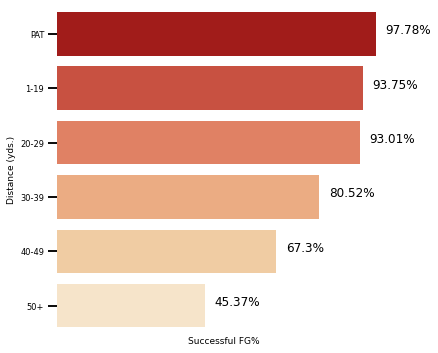

In [27]:
conversion_cols = ['PAT', '1-19', '20-29', '30-39', '40-49', '50+']
conversion_results = [97.78, 93.75, 93.01, 80.52, 67.3, 45.37]

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=[round(i,1) for i in conversion_results], y=conversion_cols, orient='h', palette='OrRd_r')

sns.despine(left=True, bottom=True)
sns.set_context('poster', font_scale=.5)
ax.set_xlabel('Successful FG%')
ax.set_ylabel('Distance (yds.)')
ax.set_xticks([])
for i, v in enumerate(conversion_results):
    ax.text(v + 3, i, str(v) + '%', color='black', fontweight='ultralight')
plt.savefig('Bar_of_results_2021_post_changes')

ok but for real did the UTEP guy miss thos kicks what on Earth is going on?

In [11]:
##Determining Expected Values##
#Multiplying by .03, number of points for a field goal, accounting for above percentage)
expected_values = {}
for i in conversion_rates:
    if i != 'PAT':
        expected_values[i] = round(conversion_rates[i] * .03,3)
    else:
        expected_values[i] = round(conversion_rates[i] * .01,3)
expected_values

{'PAT': 0.978,
 '1-19': 2.812,
 '20-29': 2.79,
 '30-39': 2.416,
 '40-49': 2.019,
 '50+': 1.361}

In [12]:
##Tabulating Added value by yardage
kick_data['PATAV'] = (kick_data['PATM']) - (.978*kick_data['PATA'])
kick_data['1-19AV'] =(3*kick_data['1-19M']) - (2.812*kick_data['1-19A'])
kick_data['20-29AV'] = (3*kick_data['20-29M']) - (2.79*kick_data['20-29A'])
kick_data['30-39AV'] = (3*kick_data['30-39M']) - (2.419*kick_data['30-39A'])
kick_data['40-49AV'] = (3*kick_data['40-49M']) - (2.019*kick_data['40-49A'])
kick_data['50+AV'] = (3*kick_data['50+M']) - (1.361*kick_data['50+A'])

##Changing dtype of 1-19 to Float, all zero##
kick_data['1-19AV'] = kick_data['1-19AV'].astype(float)

##Summing all AV columns##
kick_data['Total Added Value'] = kick_data[['PATAV','1-19AV', '20-29AV', '30-39AV', '40-49AV', '50+AV']].sum(axis=1)

Basically missing an XP was like losing a point given the ratio

In [13]:
##Allowing for full dataset view##
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Dropping last column before graphing
kick_data.drop(kick_data.tail(1).index, inplace=True)

kick_data.sort_values('Total Added Value')

,Player,Team,Lg,Pts,PATM,PATA,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A,PATAV,1-19AV,20-29AV,30-39AV,40-49AV,50+AV,Total Added Value
52,Charlie Kuhbander,NU,47.0,39.0,21.0,21.0,6,13,0,0,4,5,1,5,1,3,0,0,0.462,0.000,-1.95,-9.095,-3.057,0.000,-13.640
53,Connor Culp,NEB,51.0,46.0,28.0,32.0,6,12,0,0,3,4,1,4,0,1,2,3,-3.296,0.000,-2.16,-6.676,-2.019,1.917,-12.234
97,Joseph Petrino,UMD,48.0,67.0,34.0,38.0,11,18,0,0,3,3,4,6,4,8,0,1,-3.164,0.000,0.63,-2.514,-4.152,-1.361,-10.561
86,Thomas Cluckey,TOL,50.0,89.0,47.0,47.0,14,24,0,0,5,5,5,8,3,8,1,3,1.034,0.000,1.05,-4.352,-7.152,-1.083,-10.503
62,Stephen Johnson,OHIO,44.0,72.0,24.0,26.0,16,23,1,1,9,10,4,6,2,5,0,1,-1.428,0.188,-0.90,-2.514,-4.095,-1.361,-10.110
26,Chase Gabriel,FIU,53.0,52.0,28.0,31.0,8,13,1,1,4,5,0,2,2,4,1,1,-2.318,0.188,-1.95,-4.838,-2.076,1.639,-9.355
92,Daniel Obarski,UCF,40.0,66.0,51.0,52.0,5,10,0,0,2,2,2,3,1,5,0,0,0.144,0.000,0.42,-1.257,-7.095,0.000,-7.788
104,Connor Coles,USU,52.0,106.0,49.0,51.0,19,28,0,0,7,8,6,7,5,10,1,3,-0.878,0.000,-1.32,1.067,-5.190,-1.083,-7.404
80,Merek Glover,TUL,41.0,51.0,33.0,33.0,6,11,0,0,2,4,1,2,3,5,0,0,0.726,0.000,-5.16,-1.838,-1.095,0.000,-7.367
78,Rory Bell,TEMP,55.0,50.0,23.0,23.0,9,16,0,0,1,1,5,6,2,8,1,1,0.506,0.000,0.21,0.486,-10.152,1.639,-7.311


In [14]:
kick_data.sort_values('Team')

,Player,Team,Lg,Pts,PATM,PATA,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A,PATAV,1-19AV,20-29AV,30-39AV,40-49AV,50+AV,Total Added Value
0,Matthew Dapore,AFA,49.0,45.0,24.0,24.0,7,9,1,1,1,1,4,6,1,1,0,0,0.528,0.188,0.21,-2.514,0.981,0.000,-0.607
1,Cory Smigel,AKR,40.0,50.0,29.0,30.0,7,11,1,1,1,1,4,5,1,3,0,1,-0.340,0.188,0.21,-0.095,-3.057,-1.361,-4.455
2,Will Reichard,ALA,51.0,116.0,68.0,69.0,16,20,0,0,3,3,7,8,5,7,1,2,0.518,0.000,0.63,1.648,0.867,0.278,3.941
3,Chandler Staton,APP,48.0,109.0,52.0,52.0,19,20,0,0,8,8,5,6,6,6,0,0,1.144,0.000,1.68,0.486,5.886,0.000,9.196
5,Cam Little,ARK,51.0,100.0,43.0,43.0,19,23,0,0,7,7,5,6,6,7,1,3,0.946,0.000,1.47,0.486,3.867,-1.083,5.686
6,Cole Talley,ARMY,33.0,62.0,41.0,43.0,7,9,0,0,3,4,4,4,0,1,0,0,-1.054,0.000,-2.16,2.324,-2.019,0.000,-2.909
7,Blake Grupe,ARST,50.0,91.0,31.0,32.0,20,25,0,0,4,4,10,12,5,8,1,1,-0.296,0.000,0.84,0.972,-1.152,1.639,2.003
4,Christian Zendejas,ASU,40.0,57.0,39.0,40.0,6,9,0,0,4,4,1,4,1,1,0,0,-0.120,0.000,0.84,-6.676,0.981,0.000,-4.975
8,Anders Carlson,AUB,49.0,77.0,35.0,36.0,14,21,0,0,6,6,2,4,6,8,0,3,-0.208,0.000,1.26,-3.676,1.848,-4.083,-4.859
9,Isaiah Hankins,BAY,48.0,96.0,54.0,54.0,14,20,0,0,5,5,6,8,3,5,0,2,1.188,0.000,1.05,-1.352,-1.095,-2.722,-2.931


In [15]:
abs_value = {}
yardages = ['1-19', '20-29', '30-39', '40-49', '50+']
for i in yardages:
    abs_value[i] = abs(kick_data[i+'AV']).sum()
print(abs_value)

{'1-19': 5.632000000000002, '20-29': 160.53, '30-39': 274.6700000000001, '40-49': 286.779, '50+': 154.946}


In [71]:
sorted_data = kick_data.sort_values('Total Added Value', ascending=False)
sorted_ten = sorted_data[sorted_data['FGA'] >= 10]

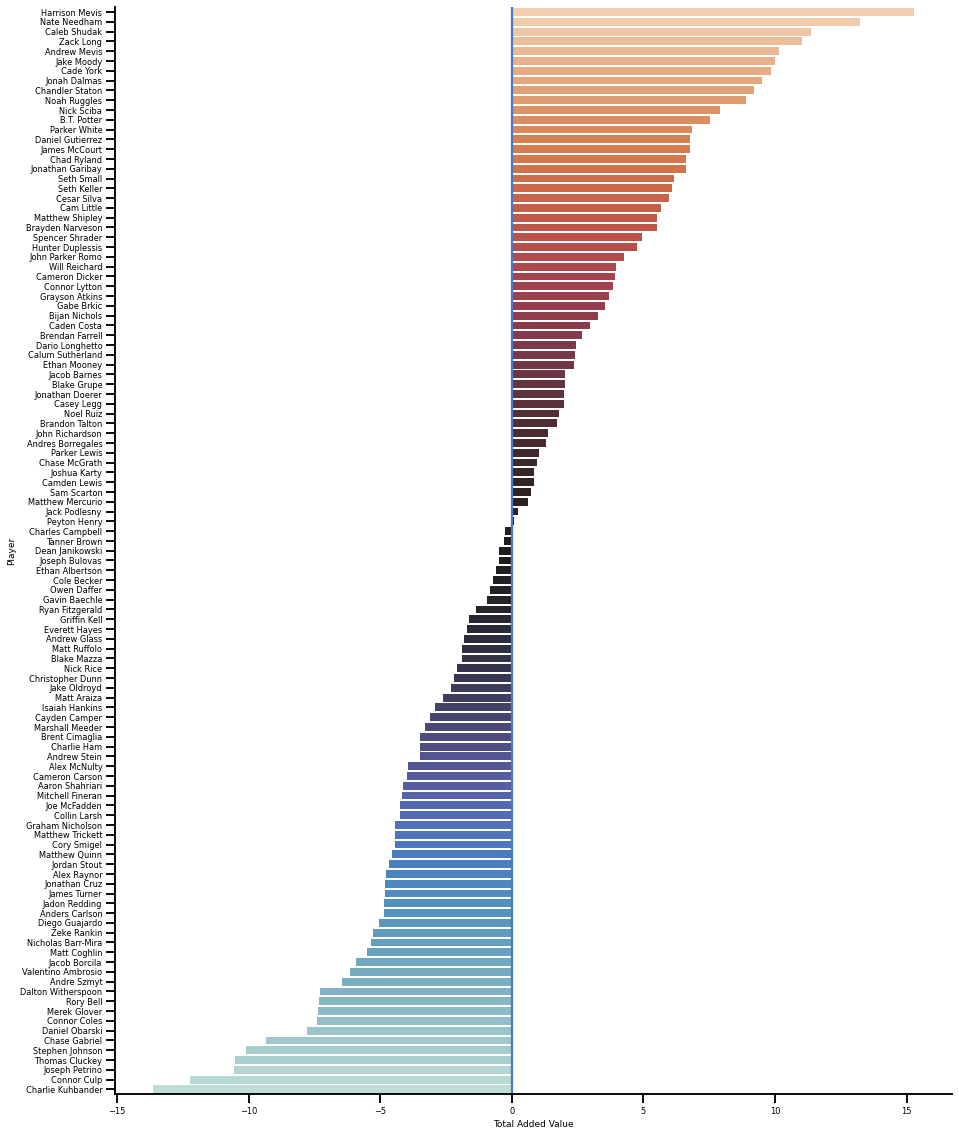

In [54]:
import matplotlib.style as style
##Setting style, size##
style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(15,20))
    
##Creating the barplot##'
ax = sns.barplot(x="Total Added Value", y="Player", data=sorted_ten, orient='h', palette='icefire_r')
##Additional Formatting##
sns.despine()
sns.set_context('talk', font_scale=.5)  #Everything is large

plt.axvline(0, 0,1, ls='-')
font = {'size'   : 22}

plt.rc('font', **font)

plt.savefig('ValuePlot10_2021.png')

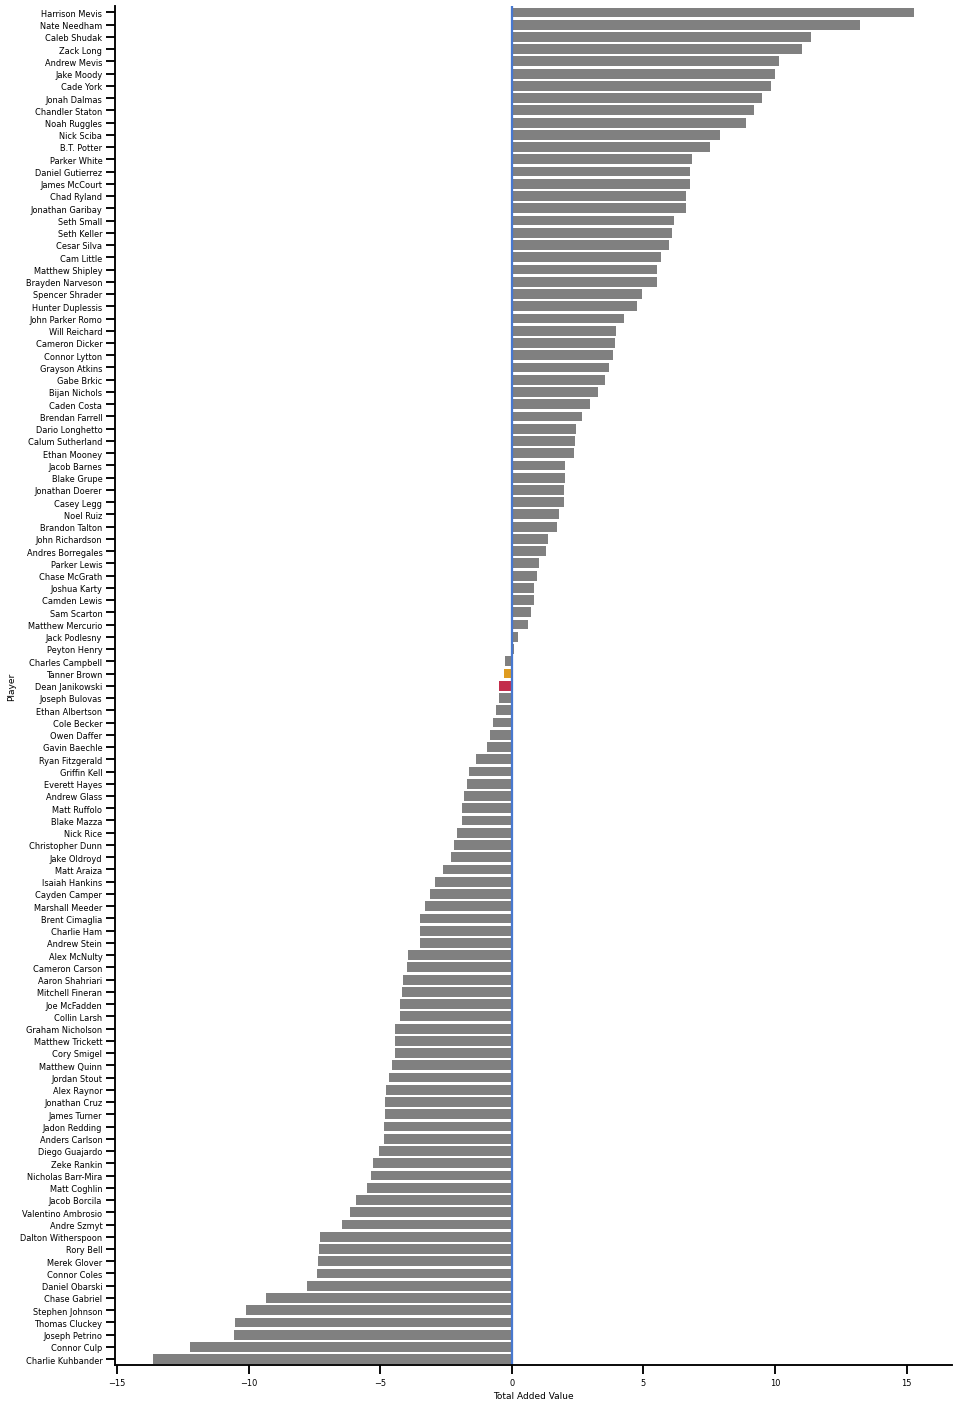

In [85]:
##Isolating Tanner Brown/Dean Janikowski

import matplotlib.style as style
##Setting style, size##
style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(15,25))

#Setting WSU/OKST specific color scheme#
clrs = []

for value in sorted_ten.Team:
    if value == 'OKST':
        clrs.append('orange')
    elif value == 'WSU':
        clrs.append('crimson')
    else:
        clrs.append('gray')
    
##Creating the barplot##'
ax = sns.barplot(x="Total Added Value", y="Player", data=sorted_ten, orient='h', palette=clrs)
##Additional Formatting##
sns.despine()
sns.set_context('talk', font_scale=.5)  #Everything is large

plt.axvline(0, 0,1, ls='-')
font = {'size'   : 22}

plt.rc('font', **font)

plt.savefig('ValuePlot10_2021_Wazzou_OKST.png')

<ipython-input-56-3a85cc84e294>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_ten['Normalized'] = normalized_value


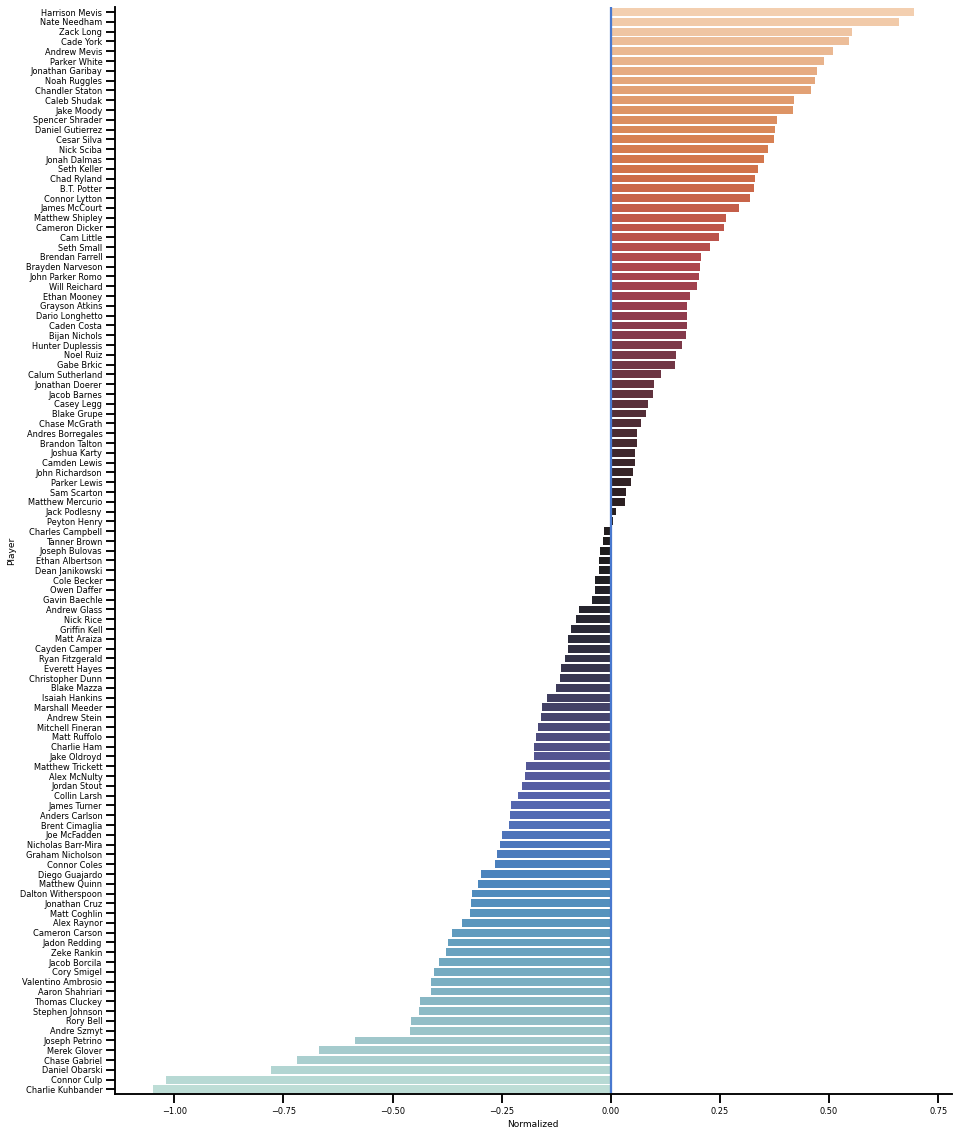

In [56]:
normalized_value = sorted_ten['Total Added Value'] / sorted_ten["FGA"]
sorted_ten['Normalized'] = normalized_value
sorted_normal = sorted_ten.sort_values('Normalized', ascending=False)
sorted_normal.to_csv('sorted_normal_2021_v2.csv')

##Setting style, size##
style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(15,20))
    
##Creating the barplot##'
ax = sns.barplot(x="Normalized", y="Player", data=sorted_normal, orient='h', palette='icefire_r')
##Additional Formatting##
sns.despine()
sns.set_context('talk', font_scale=.5)  #Everything is larger

plt.axvline(0, 0,1, ls='-')
font = {'size'   : 22}

plt.rc('font', **font)

plt.savefig('ValuePlot10normal_2021.png')

In [72]:
sorted_ten.to_csv('sorted_ten_v2_2021.csv')

In [90]:
%%capture
%load_ext sql
%sql sqlite:///kick_db.db

Top and Bottom 10, Total

In [80]:
%%sql
SELECT Player, Team, ROUND(TotalAddedValue,3) [Total AV]
  FROM sorted_ten_v2_2021
 ORDER BY [Total AV] DESC
LIMIT 10;

 * sqlite:///kick_db.db
Done.


Player,Team,Total AV
Harrison Mevis,MIZZ,15.272
Nate Needham,BGSU,13.224
Caleb Shudak,IOWA,11.357
Zack Long,TLSA,11.036
Andrew Mevis,ISU,10.163
Jake Moody,MICH,10.008
Cade York,LSU,9.838
Jonah Dalmas,BSU,9.503
Chandler Staton,APP,9.196
Noah Ruggles,OSU,8.909


In [81]:
%%sql
SELECT Player, Team, ROUND(TotalAddedValue,3) points_added
  FROM sorted_ten_v2_2021
 ORDER BY points_added ASC
LIMIT 10;

 * sqlite:///kick_db.db
Done.


Player,Team,points_added
Charlie Kuhbander,NU,-13.64
Connor Culp,NEB,-12.234
Joseph Petrino,UMD,-10.561
Thomas Cluckey,TOL,-10.503
Stephen Johnson,OHIO,-10.11
Chase Gabriel,FIU,-9.355
Daniel Obarski,UCF,-7.788
Connor Coles,USU,-7.404
Merek Glover,TUL,-7.367
Rory Bell,TEMP,-7.311


Top and Bottom 10, Per Kick

In [83]:
%%sql
SELECT Player, Team, ROUND(Normalized,3) [AV Per Kick]
  FROM sorted_normal_2021_v2
 ORDER BY [AV Per Kick] ASC
LIMIT 10;

 * sqlite:///kick_db.db
Done.


Player,Team,AV Per Kick
Charlie Kuhbander,NU,-1.049
Connor Culp,NEB,-1.02
Daniel Obarski,UCF,-0.779
Chase Gabriel,FIU,-0.72
Merek Glover,TUL,-0.67
Joseph Petrino,UMD,-0.587
Andre Szmyt,SYR,-0.461
Rory Bell,TEMP,-0.457
Stephen Johnson,OHIO,-0.44
Thomas Cluckey,TOL,-0.438


In [82]:
%%sql
SELECT Player, Team, ROUND(Normalized,3) [AV Per Kick]
  FROM sorted_normal_2021_v2
ORDER BY [AV Per Kick] DESC
LIMIT 10;

 * sqlite:///kick_db.db
Done.


Player,Team,AV Per Kick
Harrison Mevis,MIZZ,0.694
Nate Needham,BGSU,0.661
Zack Long,TLSA,0.552
Cade York,LSU,0.547
Andrew Mevis,ISU,0.508
Parker White,SCAR,0.489
Jonathan Garibay,TTU,0.472
Noah Ruggles,OSU,0.469
Chandler Staton,APP,0.46
Caleb Shudak,IOWA,0.421


In [110]:
%%sql
SELECT Player, Team, FGM, FGA
  FROM sorted_ten_v2_2021
    WHERE Team == 'OKST'
    OR Team == 'WSU';

 * sqlite:///kick_db.db
Done.


Player,Team,FGM,FGA
Tanner Brown,OKST,14,17
Dean Janikowski,WSU,14,17


In [98]:
%%sql
SELECT Player, Team, ROUND(TotalAddedValue,3), [40-49A]-[40-49M] AS Misses_Forty
  FROM sorted_ten_v2_2021
    WHERE TotalAddedValue > 0
    AND (Misses_Forty <4);

 * sqlite:///kick_db.db
Done.


Player,Team,"ROUND(TotalAddedValue,3)",Misses_Forty
Harrison Mevis,MIZZ,15.272,2
Nate Needham,BGSU,13.224,1
Caleb Shudak,IOWA,11.357,0
Zack Long,TLSA,11.036,0
Andrew Mevis,ISU,10.163,2
Jake Moody,MICH,10.008,2
Cade York,LSU,9.838,1
Jonah Dalmas,BSU,9.503,0
Chandler Staton,APP,9.196,0
Noah Ruggles,OSU,8.909,0
